In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [33]:
df=pd.read_csv(r"R:\DATA SCIENCE\Dharmarajan\IRIS FLOWER PREDICTION CLASSIFICATION\iris.csv")
df=pd.DataFrame(df)

In [34]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [35]:
df.shape

(150, 5)

In [36]:
df['variety'].drop_duplicates()

0          Setosa
50     Versicolor
100     Virginica
Name: variety, dtype: object

In [37]:
df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [38]:
filtered_df=df[(df['variety']=='Setosa') | (df['variety']=='Versicolor')]

In [39]:
filtered_df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Name: count, dtype: int64

In [40]:
filtered_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [41]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  100 non-null    float64
 1   sepal.width   100 non-null    float64
 2   petal.length  100 non-null    float64
 3   petal.width   100 non-null    float64
 4   variety       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [42]:
filtered_df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000
std,0.641698,0.478739,1.449549,0.565153
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


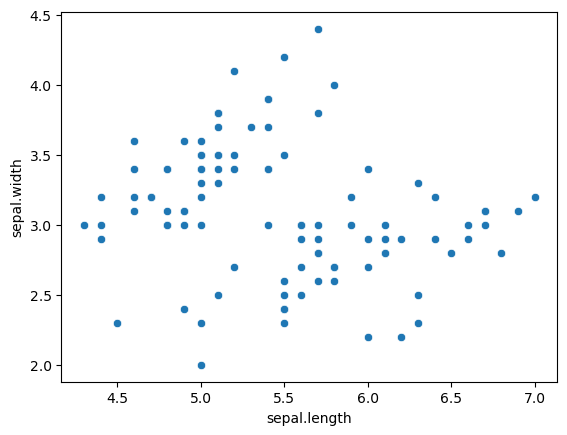

In [43]:
plt.Figure(figsize=(8,8))
sns.scatterplot(data=filtered_df, x="sepal.length", y="sepal.width")
plt.show()

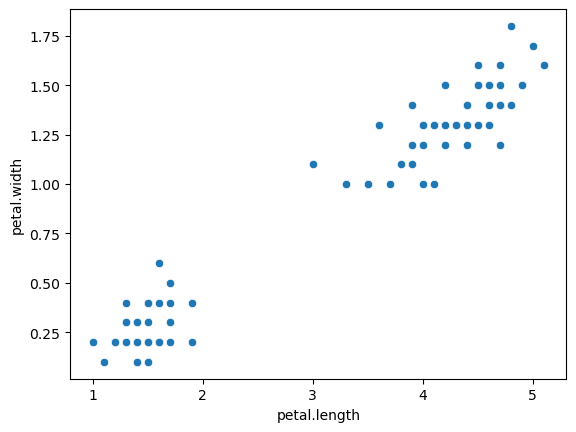

In [44]:
plt.Figure(figsize=(8,8))
sns.scatterplot(data=filtered_df, x="petal.length", y="petal.width")
plt.show()

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,StandardScaler

numerical_features=filtered_df.select_dtypes(include='float')
target_features=filtered_df['variety']


preprocess=ColumnTransformer(transformers=
                             [
                                 ('StandardScaler',StandardScaler(),numerical_features),
                                 
                             ])

In [46]:
preprocess

,transformers,"[('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [47]:
from sklearn.model_selection import train_test_split

X=filtered_df.drop('variety',axis=1)
y=filtered_df['variety']
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [49]:
print(f'X_train:{X_train.shape},y_train:{y_train.shape},x_test:{X_test.shape},y_test:{y_test.shape}')

X_train:(80, 4),y_train:(80,),x_test:(20, 4),y_test:(20,)


In [50]:
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# import xgboost as xgb
# import lightgbm as lgb
# import catboost as cb

# le = LabelEncoder()
# y = le.fit_transform(y)

# models = {
#     "Logistic Regression": LogisticRegression(max_iter=500),
#     "Naive Bayes": GaussianNB(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "SVM": SVC(),
#     "KNN": KNeighborsClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "XGBoost": xgb.XGBClassifier(eval_metric="mlogloss"),  # fixed
#     "LightGBM": lgb.LGBMClassifier(),
#     "CatBoost": cb.CatBoostClassifier(verbose=0)
# }


# # Train each model with a pipeline
# for name, model in models.items():
#     pipe = Pipeline([
#         ("scaler", StandardScaler()),   # scaling
#         ("clf", model)                  # classifier
#     ])
    
#     # Cross-validation score
#     scores = cross_val_score(pipe, X, y, cv=5, scoring="accuracy")
#     print(f"{name:20s} Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logi=LogisticRegression()
pipe_for_ran=Pipeline(
    steps=[
        ('preprocess',preprocess),
        ('model',logi)
    ]
)


In [52]:
pipe_for_ran

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [53]:
X_train.shape

(80, 4)

In [54]:

y_train.shape

(80,)

In [55]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print(type(y_train))
print(y_train[:10])   # show first 10 labels


X_train shape: (80, 4)
y_train shape: (80,)
<class 'numpy.ndarray'>
[1 1 0 0 1 0 0 1 0 1]


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Load and filter data (your original code)
df = pd.read_csv(r"R:\DATA SCIENCE\Dharmarajan\IRIS FLOWER PREDICTION CLASSIFICATION\iris.csv")
df = pd.DataFrame(df)
filtered_df = df[(df['variety'] == 'Setosa') | (df['variety'] == 'Versicolor')]

# Features and target
X = filtered_df.drop('variety', axis=1)
y = filtered_df['variety']

# Encode the target (convert strings to 0/1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split (using encoded y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Corrected Preprocessor: Scale numerical features only
num_features = X.columns.tolist()  # ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
preprocess = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), num_features)
])

# Pipeline
pipe_for_ran = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression())
])

# Fit the pipeline (this should now work without errors)
pipe_for_ran.fit(X_train, y_train)

# Optional: Predict and evaluate (e.g., on test set)
y_pred = pipe_for_ran.predict(X_test)
print("Predictions:", y_pred)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Predictions: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Accuracy: 1.0


In [57]:
import pickle

In [58]:
with open('iris flower.pkl',"wb") as file:
    pickle.dump(pipe_for_ran,file)

In [60]:
with open(r"R:\DATA SCIENCE\Dharmarajan\IRIS FLOWER PREDICTION CLASSIFICATION\iris flower.pkl",'rb') as f:
    pipe_for_ran =pickle.load(f)

print(pipe_for_ran.predict(X_test))

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]


In [62]:
filtered_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
95,5.7,3.0,4.2,1.2,Versicolor
96,5.7,2.9,4.2,1.3,Versicolor
97,6.2,2.9,4.3,1.3,Versicolor
98,5.1,2.5,3.0,1.1,Versicolor
99,5.7,2.8,4.1,1.3,Versicolor
